<a href="https://colab.research.google.com/github/Rtengmiami/text_mining/blob/main/Tf_idf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import math

In [195]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Data Processing

In [196]:
df = pd.read_csv('/content/drive/MyDrive/NTUST/111-2/AI and analyst/elon_musk_tweets_solve.csv',encoding= 'unicode_escape')
#去除網站
df= df['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
df

0       @BillyM2k I find the gold toe sock  inevitably...
1                      Sock Con, the conference for socks
2       Always something new for the magazine cover an...
3                        @ExplainThisBob This guy gets it
4       Sock tech is so advanced that you can get pret...
                              ...                        
3497    @KanekoaTheGreat @DavidSacks @amuse Major problem
3498                                   @micsolana Exactly
3499                         @masegoslin @Tesla Nice work
3500                                 @JaromeBellVA Agreed
3501                                 @tobyordoxford Yikes
Name: text, Length: 3502, dtype: object

In [197]:
#分詞後存在double list
def flatten_list(lst):
    result = []
    for elem in lst:
        if isinstance(elem, list):
            result.extend(flatten_list(elem))
        else:
            result.append(elem)
    return result

In [199]:
#計算每一句總詞數
text= [d for d in df]
idf_count={}
dict1_tf = {}
num = 0

for i in text: 
  tf={}
  words = "".join(i.lower()).split()
  words_count = Counter(words)
  for word,count in words_count.items():
    if word not in tf:
      tf[word]=[]
    if word in tf:
      tf[word]=count/len(words)
    if word not in idf_count:
      idf_count[word]=[]
    if word in idf_count:
      if count>1:
        count=1
      idf_count[word]=count     
     
  dict1_tf[num]=tf
  num+=1
idf = idf_count.copy()
#出來有完整tf idf的次數
for k,v in idf.items():
  idf[k]=math.log(len(text)/v)
#tf x idf
for key in dict1_tf:
  for subkey in dict1_tf[key]:
    if subkey in idf:
      dict1_tf[key][subkey]*=idf[subkey]

In [207]:
#從tf x idf 結果中找出top20
top_count=Counter()
for sub_dict in dict1_tf.values():
  top_count.update(sub_dict)
sort_result = sorted(top_count.items(),key = lambda x:x[1],reverse= True)

top10 =sort_result[0:100]
x_data = [item[0] for item in top10]
y_data = [item[1] for item in top10]



<BarContainer object of 40 artists>

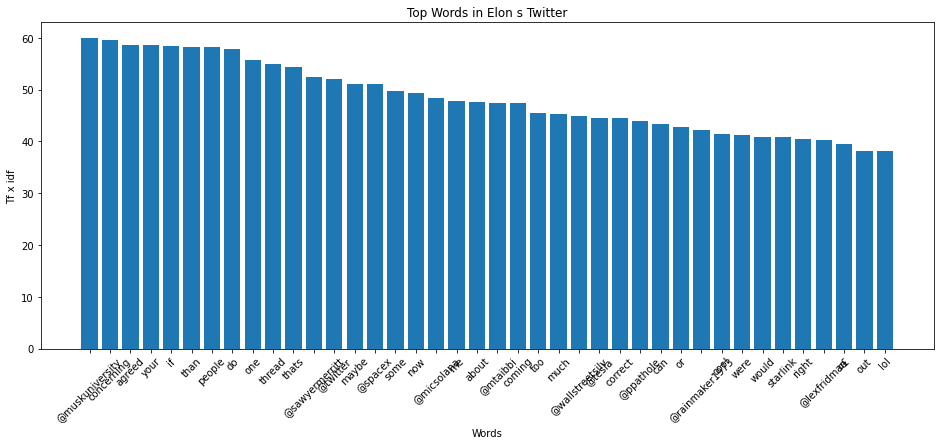

In [208]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=45)
plt.title('Top Words in Elon s Twitter')
plt.xlabel('Words')
plt.ylabel('Tf x idf')

plt.bar(x_data,y_data)